# Import Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 : Loading the Dataset

In [49]:
# loading all the 4 csv files

file1=pd.read_csv("region.csv")
file1.head()

,state,region
0,Alabama,South
1,Alaska,West
2,Arizona,Southwest
3,Arkansas,South
4,California,West


In [50]:
file2=pd.read_csv("states_gdp.csv")
file2.head()

,code,state,gdp_million
0,1000,Alabama,191481.0
1,2000,Alaska,56622.8
2,4000,Arizona,275199.1
3,5000,Arkansas,114251.5
4,6000,California,2262771.2


In [51]:
file3=pd.read_csv("states_population.csv")
file3.head()

,state,population_2013
0,Alabama,4833722
1,Alaska,735132
2,Arizona,6626624
3,Arkansas,2959373
4,California,38332521


In [52]:
file4=pd.read_csv("universities_data.csv")
file4.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,"-865,685","3,478,337",Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,"-868,092","3,350,223",Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,"-86,174","3,236,261",Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,"-866,384","3,472,282",Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,"-862,957","3,236,432",Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [53]:
# merge first 2 files before going to EDA

file1=pd.read_csv("region.csv")
file2=pd.read_csv("states_gdp.csv")
data1=pd.merge(file1,file2,on='state',how='inner')
data1.head()

,state,region,code,gdp_million
0,Alabama,South,1000,191481.0
1,Alaska,West,2000,56622.8
2,Arizona,Southwest,4000,275199.1
3,Arkansas,South,5000,114251.5
4,California,West,6000,2262771.2


In [54]:
# printing the no of columns in each files

data1.columns

Index(['state', 'region', 'code', 'gdp_million'], dtype='object')

In [55]:
file3.columns

Index(['state', 'population_2013'], dtype='object')

In [56]:
file4.columns

Index(['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered',
       'County name', 'Longitude location of institution',
       'Latitude location of institution', 'Religious affiliation',
       'Offers Less than one year certificate',
       ...
       'Percent of freshmen receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)'],
      dtype='object', length=145)

# Step 2 : Data Profilling and Cleaning

In [57]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        51 non-null     object 
 1   region       51 non-null     object 
 2   code         51 non-null     int64  
 3   gdp_million  51 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


In [58]:
print("\nColumns with missing value\n") 
print(data1.isnull().any())


Columns with missing value

state          False
region         False
code           False
gdp_million    False
dtype: bool


In [59]:
file3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            51 non-null     object
 1   population_2013  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [60]:
print("\nColumns with missing value\n") 
print(file3.isnull().any())


Columns with missing value

state              False
population_2013    False
dtype: bool


In [61]:
file4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(114), int64(2), object(29)
memory usage: 1.7+ MB


In [62]:
print("\nColumns with missing value\n") 
print(file4.isnull().any())


Columns with missing value

ID number                                                False
Name                                                     False
year                                                     False
ZIP code                                                 False
Highest degree offered                                   False
                                                         ...  
Percent of freshmen receiving student loan aid            True
Percent of freshmen receiving federal student loans       True
Percent of freshmen receiving other loan aid              True
Endowment assets (year end) per FTE enrollment (GASB)     True
Endowment assets (year end) per FTE enrollment (FASB)     True
Length: 145, dtype: bool


In [63]:
# Handling null values

In [64]:
# There are a few columns that contain null values,to get the total no of null value columns we use isnull()+sum()+sum() method

file4.isnull().sum().sum()

16335

In [65]:
# count the no of null values in each column,to get this by using isnull()+sum() method

file4.isnull().sum()

ID number                                                   0
Name                                                        0
year                                                        0
ZIP code                                                    0
Highest degree offered                                      0
                                                         ... 
Percent of freshmen receiving student loan aid             42
Percent of freshmen receiving federal student loans        42
Percent of freshmen receiving other loan aid               42
Endowment assets (year end) per FTE enrollment (GASB)    1018
Endowment assets (year end) per FTE enrollment (FASB)     574
Length: 145, dtype: int64

# Step 3 : EDA and Visualization

In [66]:
# find the highest no of applications

no_of_applications = file4[['Name','Applicants total']].sort_values("Applicants total",ascending = False).head(20)
no_of_applications

,Name,Applicants total
84,University of California-Los Angeles,72676.0
81,University of California-Berkeley,61717.0
86,University of California-San Diego,60832.0
841,New York University,57845.0
83,University of California-Irvine,56515.0
87,University of California-Santa Barbara,55258.0
77,California State University-Long Beach,55019.0
863,St John's University-New York,51634.0
126,San Diego State University,51163.0
82,University of California-Davis,49820.0


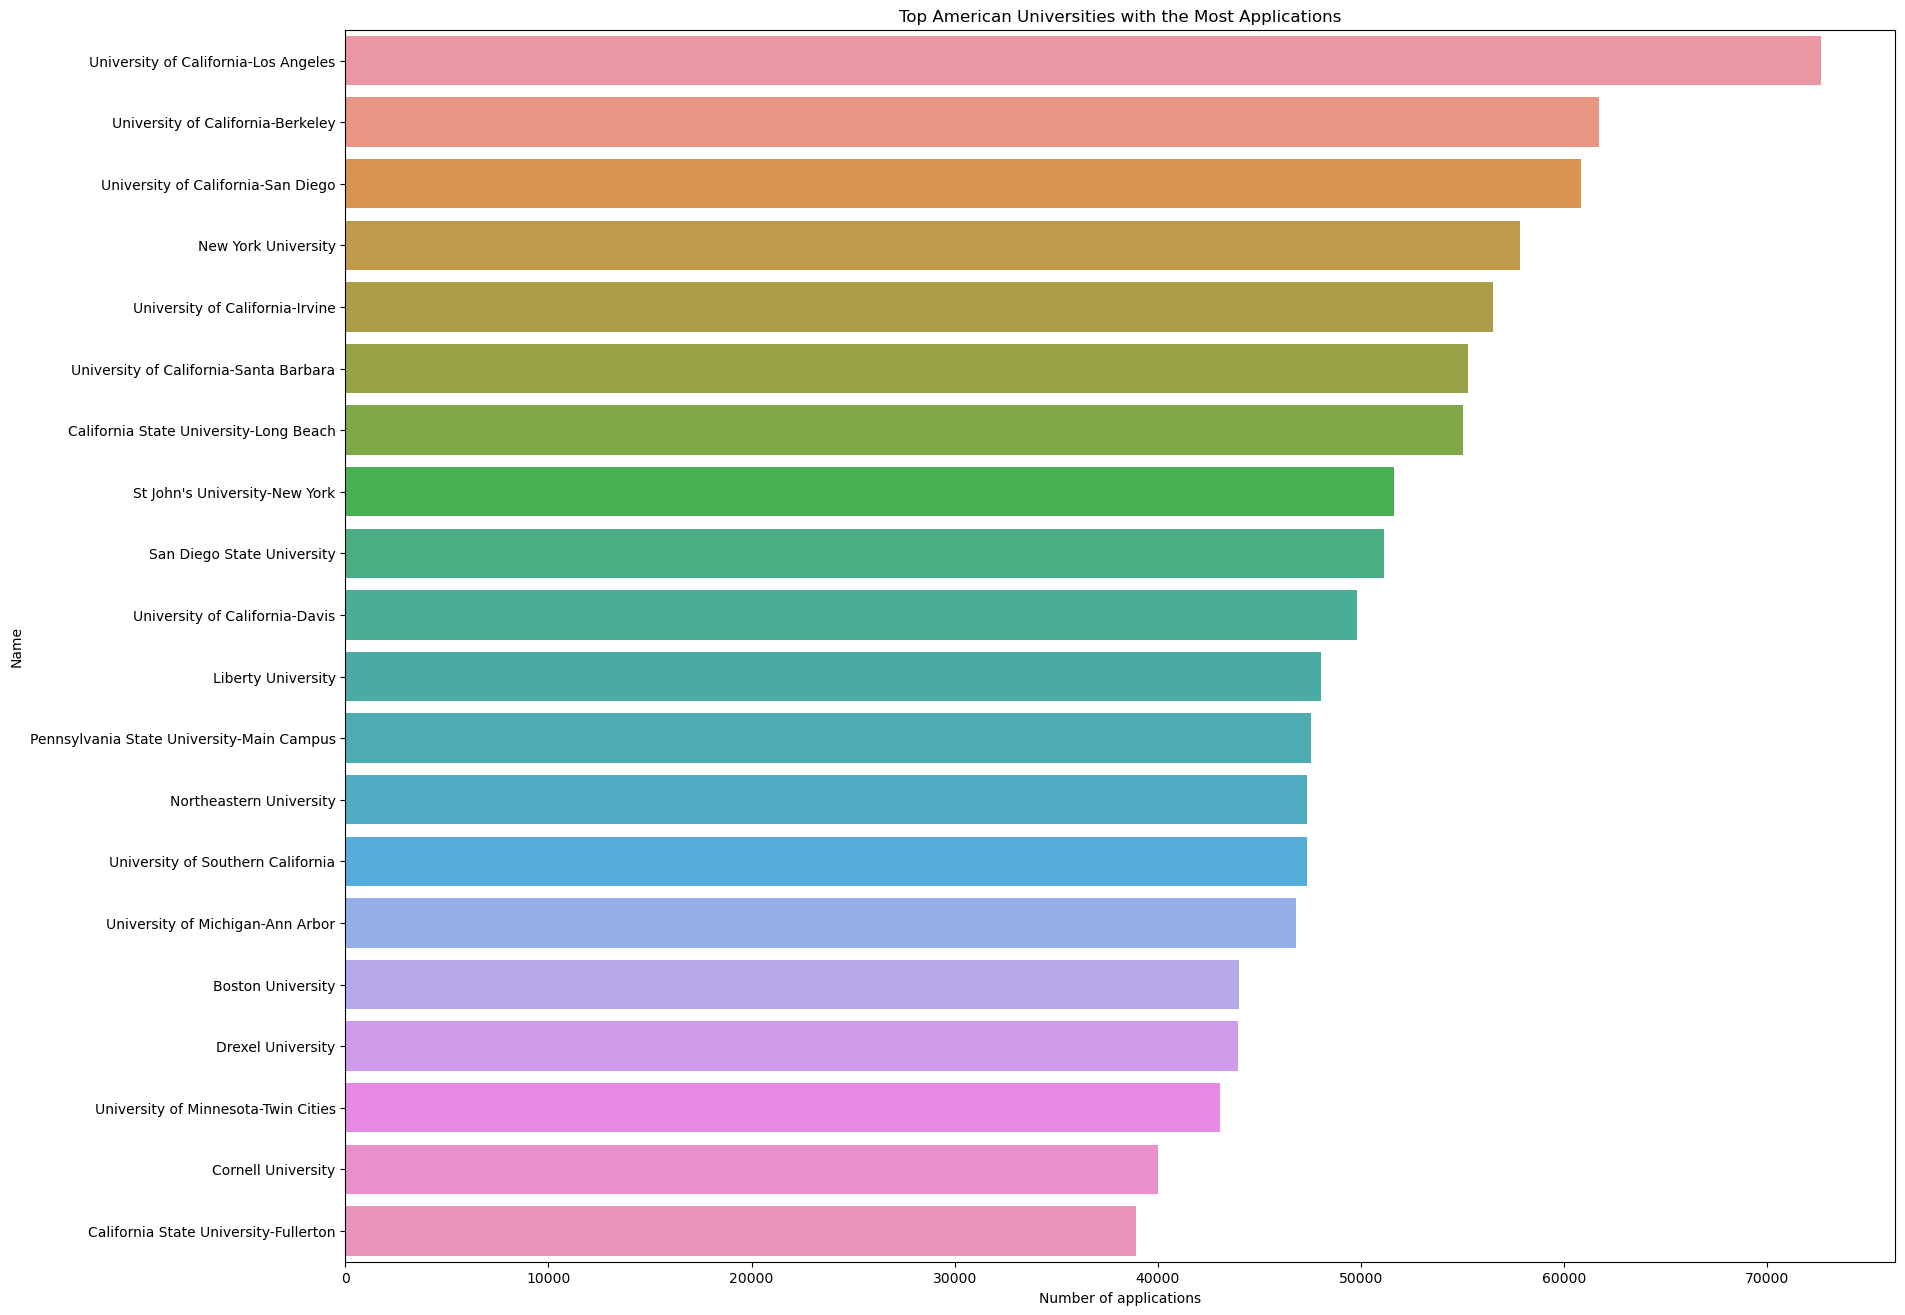

In [67]:
# plot a bar chart to display the above information

plt.figure(figsize=(20,16))
sns.barplot(x='Applicants total',y='Name',data =no_of_applications  )
plt.title('Top American Universities with the Most Applications')
plt.xlabel('Number of applications');

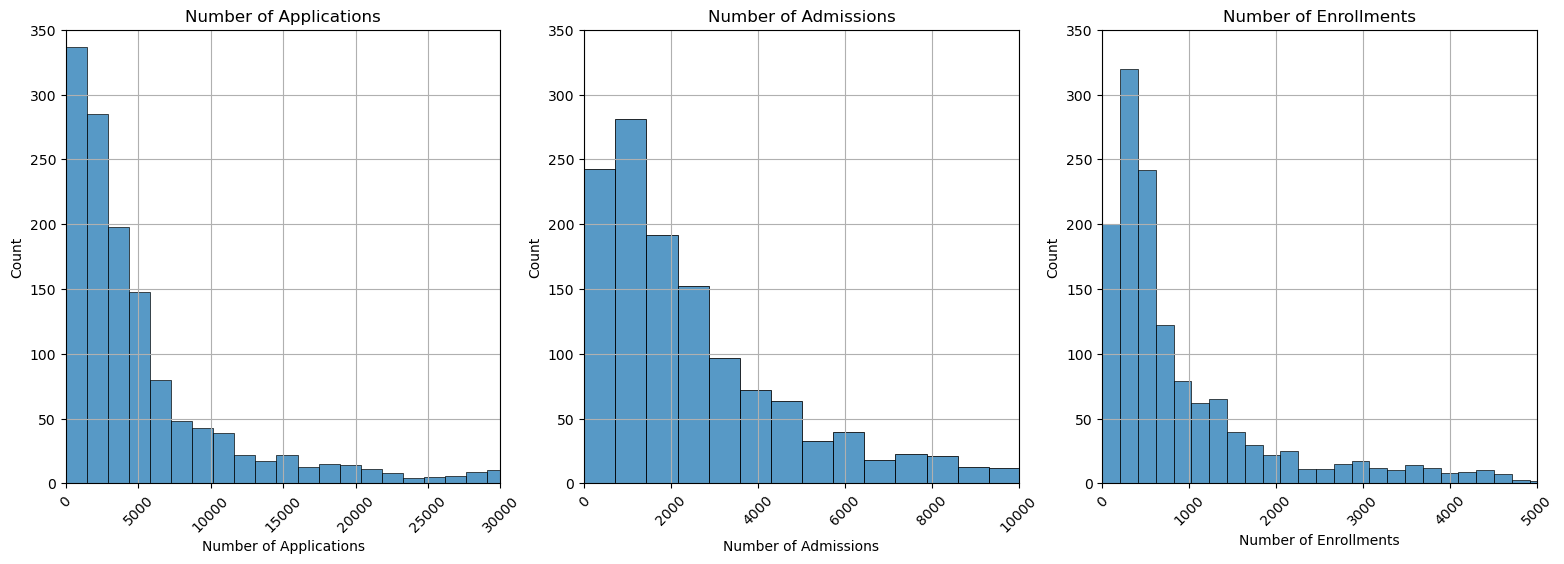

In [68]:
# method 1
# plot histogram

plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.histplot(file4['Applicants total'],bins=50)
plt.title('Number of Applications')
plt.xlabel('Number of Applications')
plt.axis([0,30000,0,350])
plt.xticks(rotation=45)
plt.grid()


plt.subplot(1,3,3)
sns.histplot(file4['Enrolled total'],bins=50)
plt.title('Number of Enrollments')
plt.axis([0,5000,0,350])
plt.xlabel('Number of Enrollments')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout(pad=2);



plt.subplot(1,3,2)
sns.histplot(file4['Admissions total'],bins=50)
plt.title('Number of Admissions')
plt.axis([0,10000,0,350])
plt.xlabel('Number of Admissions')
plt.xticks(rotation=45)
plt.grid()



In [69]:
# find out the % of admission based on the enrollments

perc_of_admission =file4['Admissions total'] / file4['Applicants total']

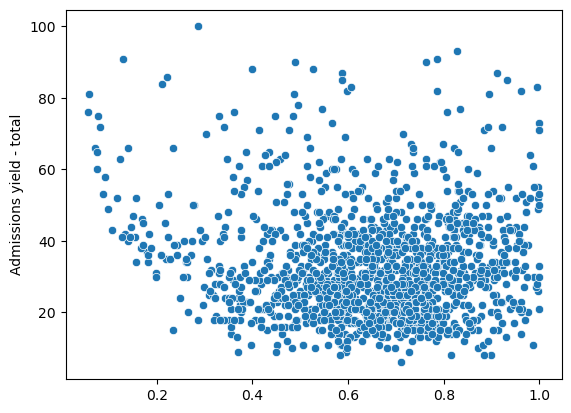

In [70]:
sns.scatterplot(data=file4, x=perc_of_admission , y=file4["Admissions yield - total"]);

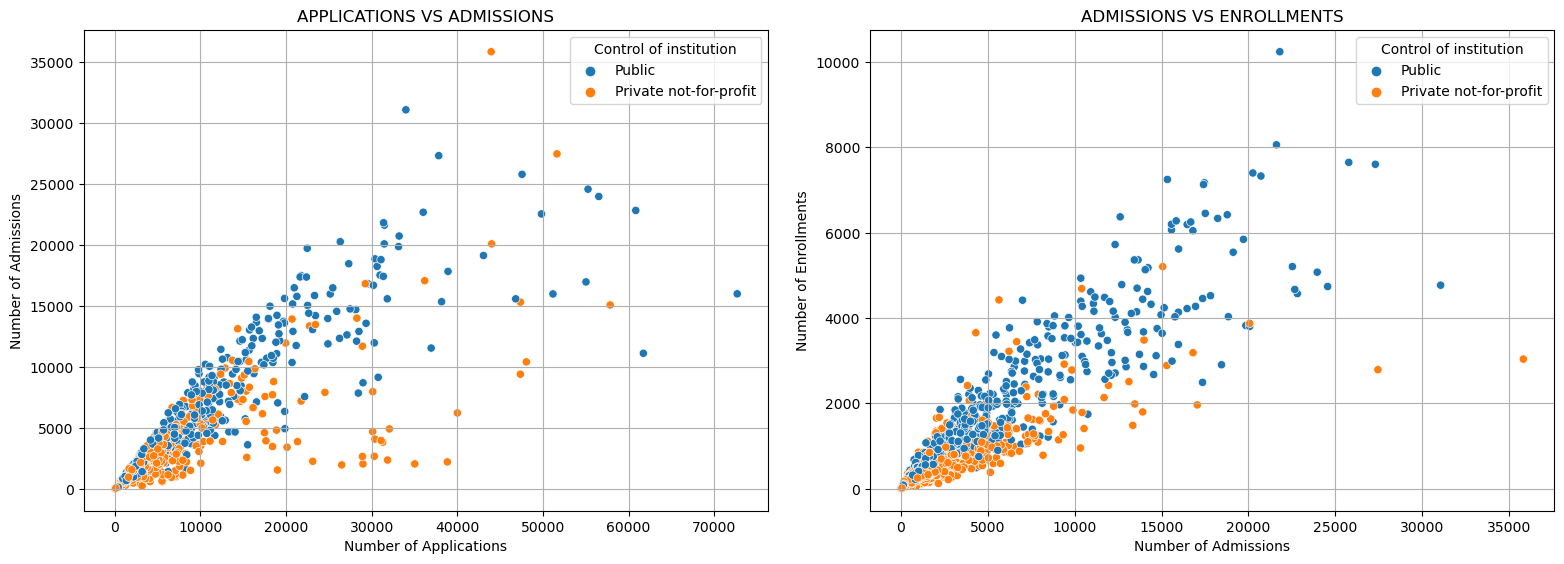

In [71]:
# method 2

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('APPLICATIONS VS ADMISSIONS')
sns.scatterplot(y=file4['Admissions total'],x=file4['Applicants total'],hue=file4['Control of institution'])
plt.ylabel('Number of Admissions')
plt.xlabel('Number of Applications')
plt.grid()

plt.subplot(1,2,2)
plt.title('ADMISSIONS VS ENROLLMENTS')
sns.scatterplot(x= file4['Admissions total'],y=file4['Enrolled total'],data=file4,hue=file4['Control of institution'])
plt.ylabel('Number of Enrollments')
plt.xlabel('Number of Admissions')
plt.grid()

plt.tight_layout(pad=2)

The first scatterplot shows that a correlation exists between high number of applications and high admission rate, but this isn't always the case. Some private universities with a high number of applications still have a low acceptance rate, which makes them selective.

The second scatterplot highlights that a direct relationship between high admission rate and high enrollment rate exists. To get a more meaningful result, we should examine the admission and enrollment rate of universities.

In [72]:
private = file4[file4['Control of institution']=='Private not-for-profit']
private = private[private['Applicants total'].notnull()]
public = file4[file4['Control of institution']=='Public']
public = public[public['Applicants total'].notnull()]

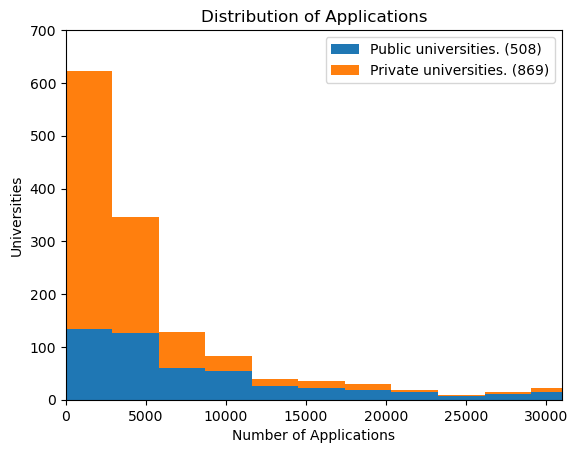

In [73]:
plt.hist([public['Applicants total'],private['Applicants total']],stacked=True,bins=25)
plt.axis([0,31000,0,700])
plt.title('Distribution of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Universities')
plt.legend(['Public universities. ({})'.format(len(public)),'Private universities. ({})'.format(len(private))]);

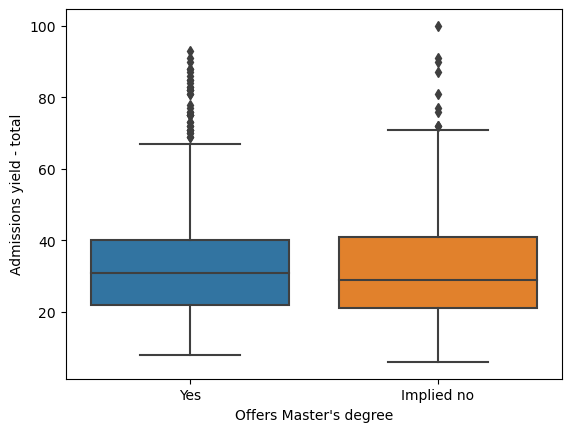

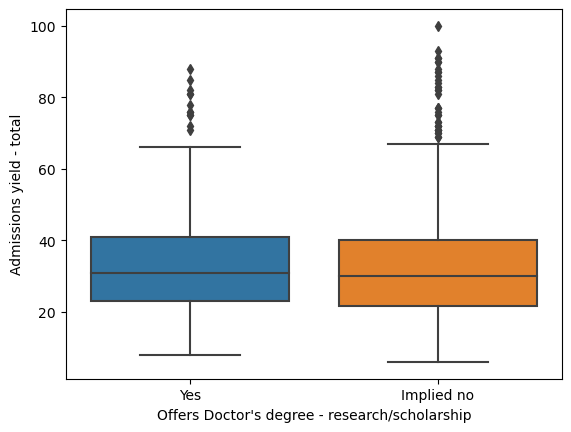

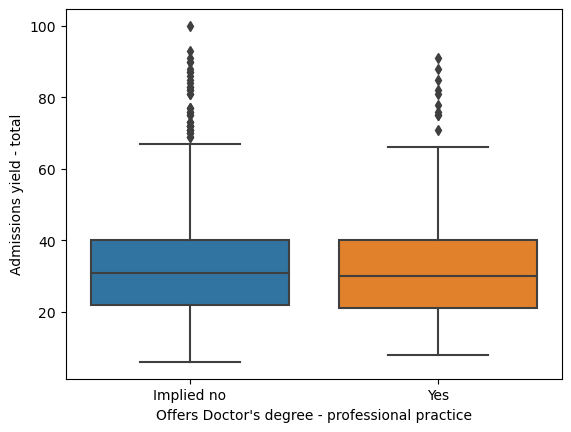

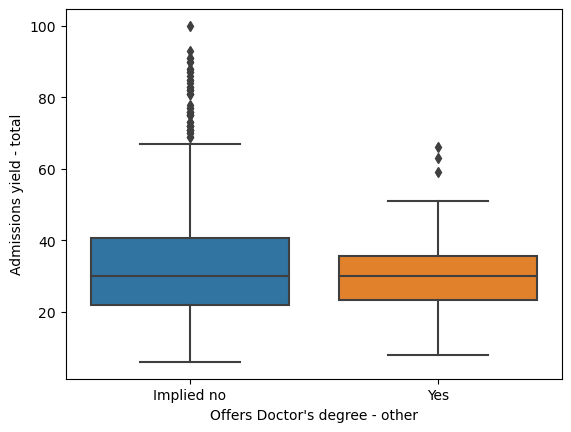

In [74]:
higher_degree = ["Offers Master's degree",
                "Offers Doctor's degree - research/scholarship",
                "Offers Doctor's degree - professional practice",
                "Offers Doctor's degree - other"]

for degree in higher_degree:
    sns.boxplot(data=file4, x=degree, y='Admissions yield - total')
    plt.show()

<AxesSubplot:>

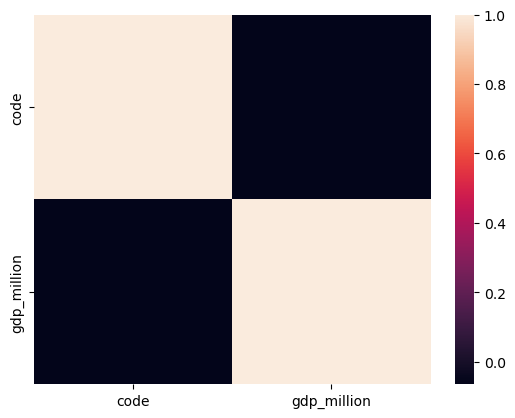

In [76]:
# plot a correlation heatmap between the columns in csv file (data1.csv)
# (heatmap)

sns.heatmap(data1.corr())
 

Text(0.5, 1.0, '\n\nState Vs Population in 2013\n\n')

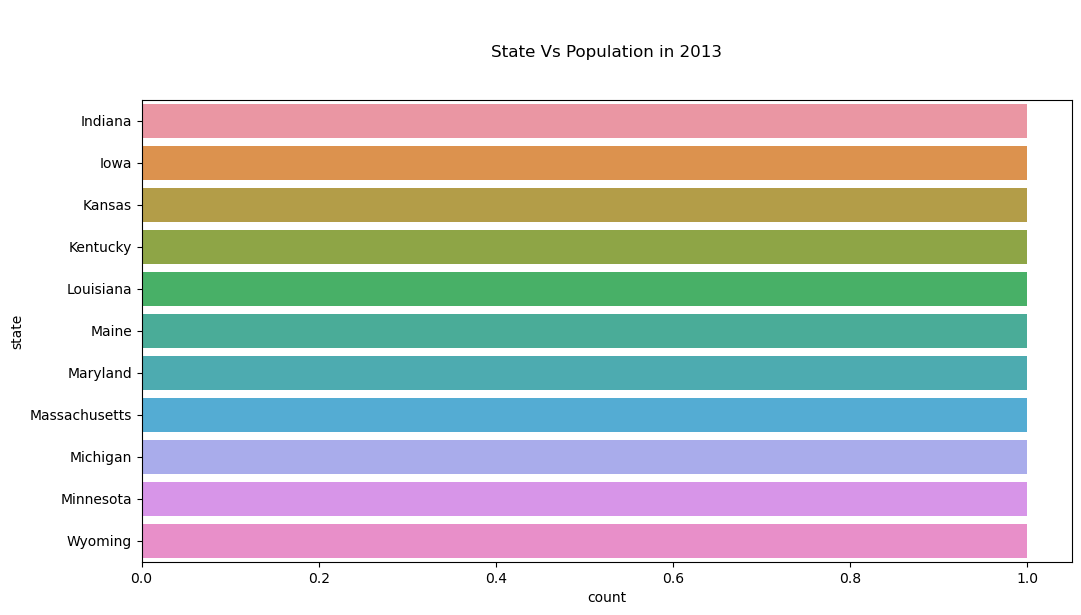

In [82]:
plt.figure(figsize=(12,6))
sns.countplot(y="state",order=file3["state"].value_counts().index[40:53],data=file3)
plt.title("\n\nState Vs Population in 2013\n\n")

# Inferences and Conclusion

1. According to the dataset University of California-Los Angeles Highest no of applications.
2. The majority of universities received less than 5000 applications. However, some universities received a much higher number of applications, as many as 30000 applications in the same year.
3. The highest no of applications are in private universities.

# References

1. Kaggle
2. Tutorials point(pandas,seaborn,matplotlib)
3. W3school(pandas,seaborn,matplotlib)
4. Google for EDA
5. Youtube for EDA